In [383]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",50)

# Project 
## Amazon Sales EDA Analysis 

In [384]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\amazon_products_sales_data_cleaned.csv")

In [385]:
df.shape

(42675, 17)

In [386]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


# Data cleaning & handling

In [387]:
df.drop(columns=["product_image_url","product_page_url","data_collected_at","delivery_date","buy_box_availability"],inplace=True)

In [388]:
df.isna().sum()

product_title               0
product_rating           1024
total_reviews            1024
purchased_last_month    10511
discounted_price         2062
original_price           2062
is_best_seller              0
is_sponsored                0
has_coupon                  0
sustainability_tags     39267
product_category            0
discount_percentage      2062
dtype: int64

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   sustainability_tags   3408 non-null   object 
 10  product_category      42675 non-null  object 
 11  discount_percentage   40613 non-null  float64
dtypes: float64(6), object(6)
memory usage: 3.9+ MB


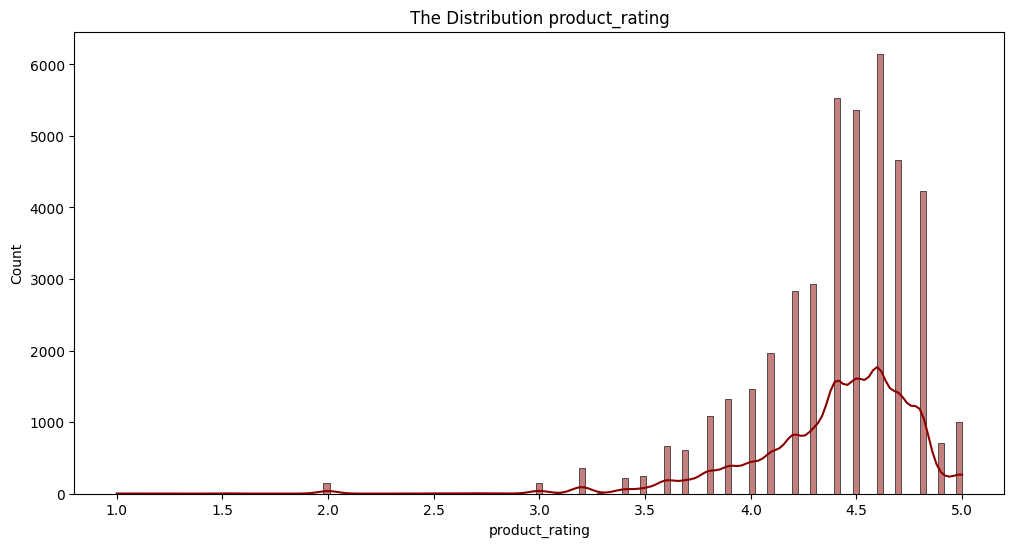

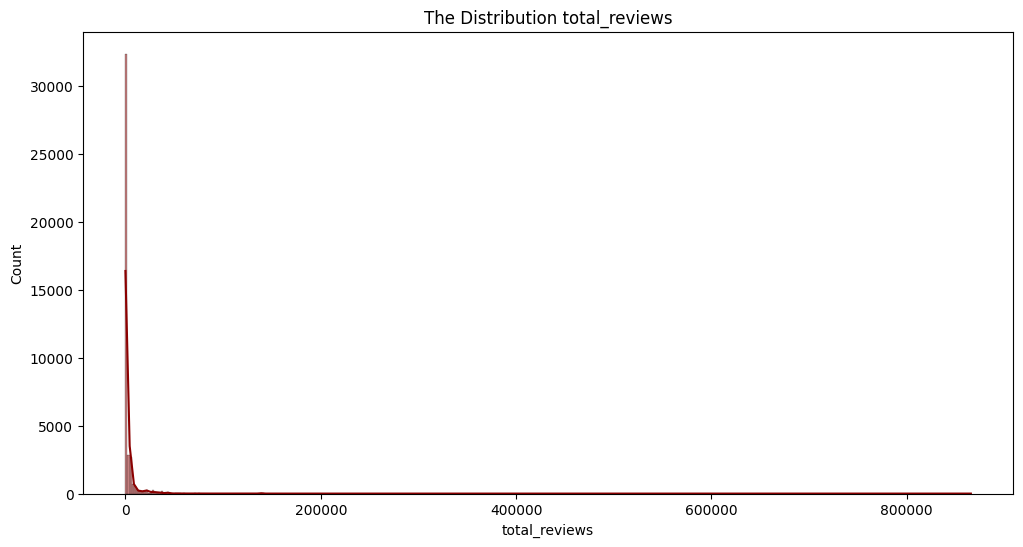

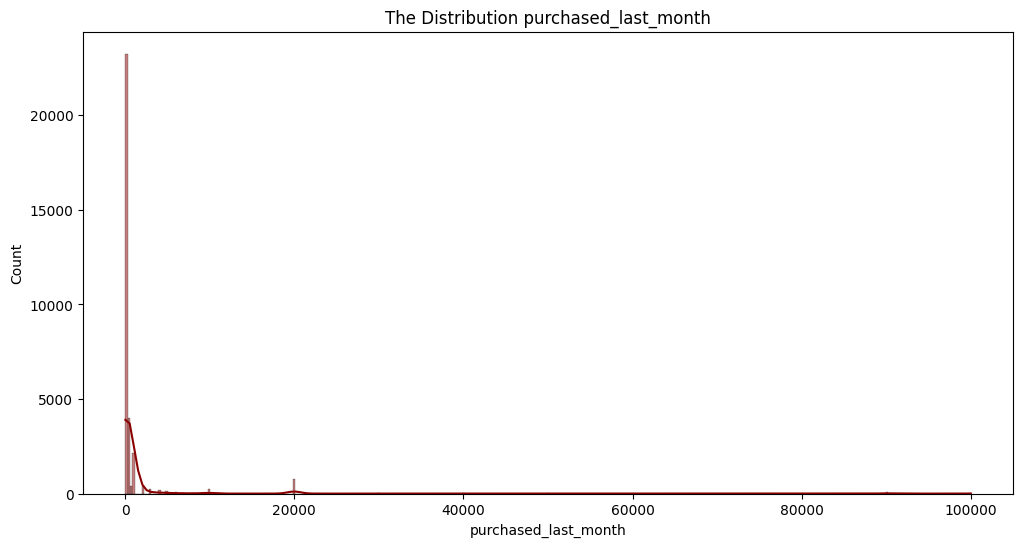

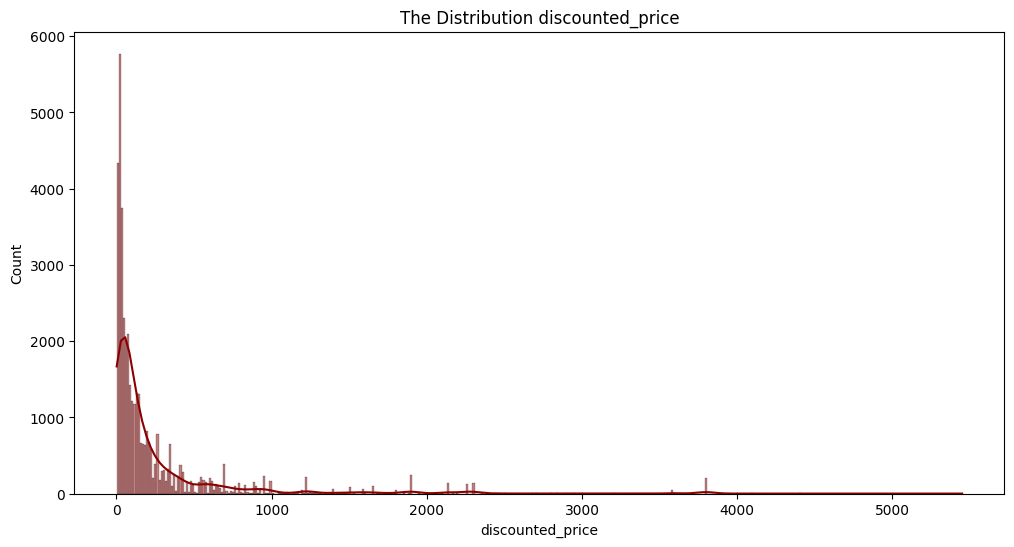

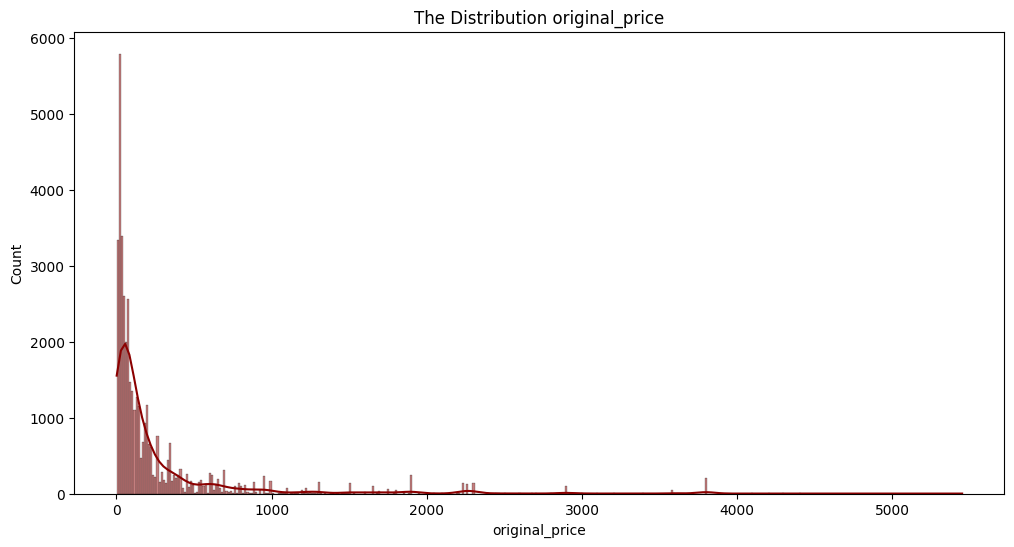

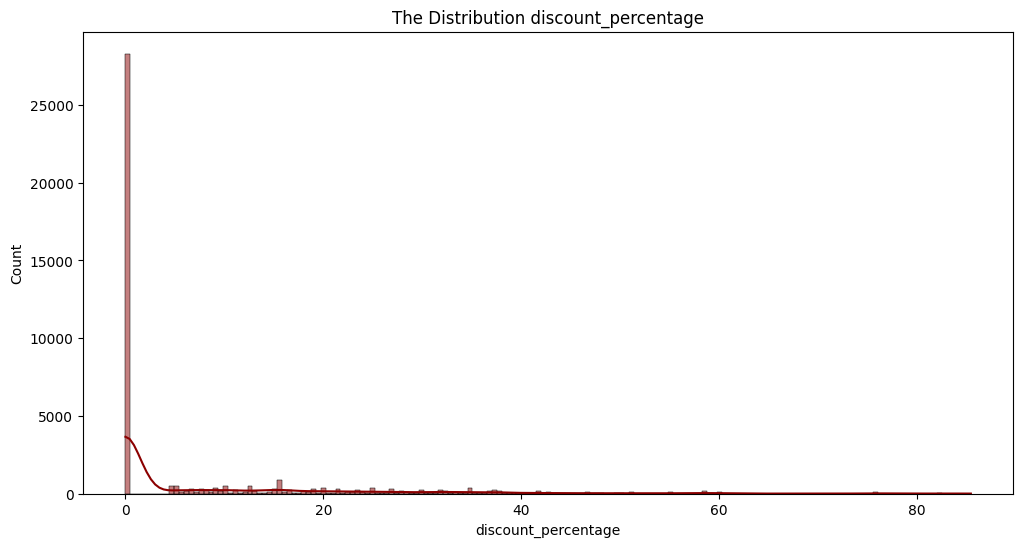

In [390]:
num_col=df.select_dtypes(include="number")
for col in num_col:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,color="darkred",edgecolor="black")
    plt.title(f"The Distribution {col}")
    plt.show()

### Detecting Skewness

In [391]:
for col in num_col:
    skew_val = df[col].skew()
    print(f"Skewness of {col}: {skew_val:.3f}")


Skewness of product_rating: -1.837
Skewness of total_reviews: 24.343
Skewness of purchased_last_month: 10.724
Skewness of discounted_price: 4.426
Skewness of original_price: 4.259
Skewness of discount_percentage: 2.373


### Detecting Outliers 

In [392]:
outliers = {}
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers[col] = df[col][outlier_mask]
    print(f"{col}: {outlier_mask.sum()} outliers")


product_rating: 924 outliers
total_reviews: 5862 outliers
purchased_last_month: 4511 outliers
discounted_price: 4888 outliers
original_price: 5069 outliers
discount_percentage: 5103 outliers


In [393]:
df["sustainability_tags"]=df["sustainability_tags"].fillna(df["sustainability_tags"].mode()[0])

In [394]:
missing_cols = [col for col in df.columns if df[col].isna().sum() > 0]
print("Columns with missing values:", missing_cols)


Columns with missing values: ['product_rating', 'total_reviews', 'purchased_last_month', 'discounted_price', 'original_price', 'discount_percentage']


In [395]:
from sklearn.impute import SimpleImputer

# Select only the columns with missing values
missing_df = df[missing_cols]

# Initialize the imputer
sm = SimpleImputer(strategy="mean")

# Fit and transform the data
imputed_array = sm.fit_transform(missing_df)

# Convert back to DataFrame with original column names
imputed_df = pd.DataFrame(imputed_array, columns=missing_cols)

# Replace the original missing columns in df
df[missing_cols] = imputed_df


# Machine Learning

In [396]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,sustainability_tags,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Carbon impact,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Small Business,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Small Business,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,Small Business,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,Small Business,Phones,0.00


In [397]:
df.drop(columns=["product_title"],inplace=True)

In [398]:
df.head()

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,sustainability_tags,product_category,discount_percentage
0,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Carbon impact,Phones,43.60
1,4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Small Business,Laptops,37.52
2,4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Small Business,Laptops,10.03
3,4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,Small Business,Phones,0.00
4,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,Small Business,Phones,0.00


In [399]:
cols_to_encode=df[["is_best_seller","is_sponsored","sustainability_tags","product_category"]]
encoded_df=pd.get_dummies(cols_to_encode,drop_first=True).astype(int)
df_comb=pd.concat([df.drop(columns=cols_to_encode.columns),encoded_df],axis=1)

In [400]:
df_comb

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,has_coupon,discount_percentage,is_best_seller_Best Seller,is_best_seller_Ends in,is_best_seller_Limited time deal,is_best_seller_No Badge,is_best_seller_Save 10%,is_best_seller_Save 12%,is_best_seller_Save 17%,is_best_seller_Save 18%,is_best_seller_Save 30%,is_best_seller_Save 77%,is_best_seller_Save 9%,is_sponsored_Sponsored,sustainability_tags_Alexa Built-in,sustainability_tags_Carbon impact,sustainability_tags_Energy efficiency,sustainability_tags_Energy efficiency +1 more,sustainability_tags_Energy efficiency +3 more,sustainability_tags_Forestry practices,sustainability_tags_Made in Italy,sustainability_tags_Manufacturing practices,sustainability_tags_Recycled materials,sustainability_tags_Recycled materials +2 more,sustainability_tags_Recycled materials +3 more,sustainability_tags_Safer chemicals +1 more,sustainability_tags_Safer chemicals +2 more,sustainability_tags_Small Business,sustainability_tags_Works with Alexa,product_category_Chargers & Cables,product_category_Gaming,product_category_Headphones,product_category_Laptops,product_category_Networking,product_category_Other Electronics,product_category_Phones,product_category_Power & Batteries,product_category_Printers & Scanners,product_category_Smart Home,product_category_Speakers,product_category_Storage,product_category_TV & Display,product_category_Wearables
0,4.6,375.0,300.0,89.68,159.00,Save 15% with coupon,43.60,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,4.3,2457.0,6000.0,9.99,15.99,No Coupon,37.52,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4.6,3044.0,2000.0,314.00,349.00,No Coupon,10.03,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4.6,35882.0,10000.0,162.24,162.24,No Coupon,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4.8,28988.0,10000.0,72.74,72.74,No Coupon,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,5.0,1.0,100.0,195.99,195.99,No Coupon,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
42671,4.2,20.0,200.0,89.99,89.99,Save $25.00 with coupon,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42672,4.3,57.0,50.0,899.99,1099.99,No Coupon,18.18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
42673,4.7,7102.0,500.0,10.39,15.98,No Coupon,34.98,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [401]:
df_comb["has_coupon"] = df["has_coupon"].apply(lambda x: "No Coupon" if x == "No Coupon" else "Has Coupon")
df_comb["has_coupon"]

0        Has Coupon
1         No Coupon
2         No Coupon
3         No Coupon
4         No Coupon
            ...    
42670     No Coupon
42671    Has Coupon
42672     No Coupon
42673     No Coupon
42674     No Coupon
Name: has_coupon, Length: 42675, dtype: object

In [402]:
df_comb["has_coupon"] = df_comb["has_coupon"].map({"No Coupon": 0, "Has Coupon": 1})


In [404]:
df_comb

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,has_coupon,discount_percentage,is_best_seller_Best Seller,is_best_seller_Ends in,is_best_seller_Limited time deal,is_best_seller_No Badge,is_best_seller_Save 10%,is_best_seller_Save 12%,is_best_seller_Save 17%,is_best_seller_Save 18%,is_best_seller_Save 30%,is_best_seller_Save 77%,is_best_seller_Save 9%,is_sponsored_Sponsored,sustainability_tags_Alexa Built-in,sustainability_tags_Carbon impact,sustainability_tags_Energy efficiency,sustainability_tags_Energy efficiency +1 more,sustainability_tags_Energy efficiency +3 more,sustainability_tags_Forestry practices,sustainability_tags_Made in Italy,sustainability_tags_Manufacturing practices,sustainability_tags_Recycled materials,sustainability_tags_Recycled materials +2 more,sustainability_tags_Recycled materials +3 more,sustainability_tags_Safer chemicals +1 more,sustainability_tags_Safer chemicals +2 more,sustainability_tags_Small Business,sustainability_tags_Works with Alexa,product_category_Chargers & Cables,product_category_Gaming,product_category_Headphones,product_category_Laptops,product_category_Networking,product_category_Other Electronics,product_category_Phones,product_category_Power & Batteries,product_category_Printers & Scanners,product_category_Smart Home,product_category_Speakers,product_category_Storage,product_category_TV & Display,product_category_Wearables
0,4.6,375.0,300.0,89.68,159.00,1,43.60,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,4.3,2457.0,6000.0,9.99,15.99,0,37.52,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4.6,3044.0,2000.0,314.00,349.00,0,10.03,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4.6,35882.0,10000.0,162.24,162.24,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4.8,28988.0,10000.0,72.74,72.74,0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,5.0,1.0,100.0,195.99,195.99,0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
42671,4.2,20.0,200.0,89.99,89.99,1,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42672,4.3,57.0,50.0,899.99,1099.99,0,18.18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
42673,4.7,7102.0,500.0,10.39,15.98,0,34.98,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [407]:
for col in df_comb.columns:
    skewed=df_comb[col].skew()
    print(f"Skew Value of {col} is {skewed}")

Skew Value of product_rating is -1.8596931484683836
Skew Value of total_reviews is 24.640282690894022
Skew Value of purchased_last_month is 12.352044165104395
Skew Value of discounted_price is 4.53729794580976
Skew Value of original_price is 4.3661258458482886
Skew Value of has_coupon is 4.353877290050309
Skew Value of discount_percentage is 2.4320138731114223
Skew Value of is_best_seller_Best Seller is 12.336896017637335
Skew Value of is_best_seller_Ends in is 20.904101291338122
Skew Value of is_best_seller_Limited time deal is 10.067604248381805
Skew Value of is_best_seller_No Badge is -4.469700359840609
Skew Value of is_best_seller_Save 10% is 26.393949457806496
Skew Value of is_best_seller_Save 12% is 40.47791922064281
Skew Value of is_best_seller_Save 17% is 28.876019787556803
Skew Value of is_best_seller_Save 18% is 27.308203383633103
Skew Value of is_best_seller_Save 30% is 18.39637813584964
Skew Value of is_best_seller_Save 77% is 146.0684768514378
Skew Value of is_best_seller_

In [409]:
df_comb.head()

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,has_coupon,discount_percentage,is_best_seller_Best Seller,is_best_seller_Ends in,is_best_seller_Limited time deal,is_best_seller_No Badge,is_best_seller_Save 10%,is_best_seller_Save 12%,is_best_seller_Save 17%,is_best_seller_Save 18%,is_best_seller_Save 30%,is_best_seller_Save 77%,is_best_seller_Save 9%,is_sponsored_Sponsored,sustainability_tags_Alexa Built-in,sustainability_tags_Carbon impact,sustainability_tags_Energy efficiency,sustainability_tags_Energy efficiency +1 more,sustainability_tags_Energy efficiency +3 more,sustainability_tags_Forestry practices,sustainability_tags_Made in Italy,sustainability_tags_Manufacturing practices,sustainability_tags_Recycled materials,sustainability_tags_Recycled materials +2 more,sustainability_tags_Recycled materials +3 more,sustainability_tags_Safer chemicals +1 more,sustainability_tags_Safer chemicals +2 more,sustainability_tags_Small Business,sustainability_tags_Works with Alexa,product_category_Chargers & Cables,product_category_Gaming,product_category_Headphones,product_category_Laptops,product_category_Networking,product_category_Other Electronics,product_category_Phones,product_category_Power & Batteries,product_category_Printers & Scanners,product_category_Smart Home,product_category_Speakers,product_category_Storage,product_category_TV & Display,product_category_Wearables
0,4.6,375.0,300.0,89.68,159.00,1,43.60,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,4.3,2457.0,6000.0,9.99,15.99,0,37.52,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4.6,3044.0,2000.0,314.00,349.00,0,10.03,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4.6,35882.0,10000.0,162.24,162.24,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4.8,28988.0,10000.0,72.74,72.74,0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [403]:
df_comb.isna().sum()
df_comb.duplicated().sum()

np.int64(33209)